In [1]:
import numpy as np
import pandas as pd

In [2]:
training_set = pd.read_csv('housing_training.csv')
training_set.drop(training_set.columns[0],axis=1, inplace=True)
training_set

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.028646,0.567133,0.614962,0.716618,0.540019,-0.893301,-1.167801,0,1,0,0,0
1,-1.719432,1.230419,0.752607,0.520580,0.702187,1.298379,0.630405,0,0,0,0,1
2,1.220517,-0.466529,-0.540779,-0.669775,-0.521917,-0.524099,-1.075941,0,1,0,0,0
3,-0.368645,-0.347807,-0.044783,-0.465790,-0.043261,-0.865508,-0.817692,0,0,0,0,1
4,-0.130270,0.412657,0.256611,0.363397,0.210453,0.329370,0.272497,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-1.163225,1.846950,1.644924,0.530294,1.311623,0.641828,0.534212,1,0,0,0,0
16508,-1.083767,2.413517,2.098202,2.952509,2.402331,-0.556261,-1.009212,0,1,0,0,0
16509,1.538349,-0.884120,-0.882517,-0.854333,-0.856715,-0.363712,-0.575909,1,0,0,0,0
16510,-1.163225,0.238011,0.099981,-0.192044,0.003820,0.171457,0.444085,1,0,0,0,0


In [3]:
training_label = training_set['median_house_value'].copy()
training_set.drop(['median_house_value'], axis=1, inplace=True)
training_label

0       -1.167801
1        0.630405
2       -1.075941
3       -0.817692
4        0.272497
           ...   
16507    0.534212
16508   -1.009212
16509   -0.575909
16510    0.444085
16511   -1.249262
Name: median_house_value, Length: 16512, dtype: float64

In [4]:
mask = ~np.isnan(training_set).any(axis=1)  # keep only rows without NaN
training_set = training_set[mask]
training_label = training_label[mask]
del mask


In [5]:
training_set

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.028646,0.567133,0.614962,0.716618,0.540019,-0.893301,0,1,0,0,0
1,-1.719432,1.230419,0.752607,0.520580,0.702187,1.298379,0,0,0,0,1
2,1.220517,-0.466529,-0.540779,-0.669775,-0.521917,-0.524099,0,1,0,0,0
3,-0.368645,-0.347807,-0.044783,-0.465790,-0.043261,-0.865508,0,0,0,0,1
4,-0.130270,0.412657,0.256611,0.363397,0.210453,0.329370,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16507,-1.163225,1.846950,1.644924,0.530294,1.311623,0.641828,1,0,0,0,0
16508,-1.083767,2.413517,2.098202,2.952509,2.402331,-0.556261,0,1,0,0,0
16509,1.538349,-0.884120,-0.882517,-0.854333,-0.856715,-0.363712,1,0,0,0,0
16510,-1.163225,0.238011,0.099981,-0.192044,0.003820,0.171457,1,0,0,0,0


In [6]:
def linear_regression(features, targets, weights, bias, learning_rate, epochs):
    # define the number of training examples
    m = features.shape[1]
    # remain in the loop until ends
    while epochs:
        # y_hat formula    
        prediction = np.dot(features, weights) + bias
        # calculate error
        error = prediction - targets
        # update the cost function with respect to weigth and bias
        delta_w = (1 / m) * np.dot(features.T, error)
        delta_b = (1 / m) * np.sum(error)
        # gradient decent algorithm
        weights -= (learning_rate * delta_w)
        bias -= (learning_rate * delta_b)
        # closing in the loop
        epochs -= 1
        
    return (weights, bias)

In [7]:
w = np.zeros(training_set.shape[1])
b = 0
alpha = 0.00005
epochs = 10000

In [8]:
trained_w, trained_b  = linear_regression(training_set, training_label, w, b, alpha, epochs)

In [9]:
trained_w

array([ 0.13355965, -0.14096054,  0.29959018, -0.36565153,  0.25595717,
        0.66585627,  0.0999173 , -0.48987394,  0.12269083,  0.13258145,
        0.20626828])

In [10]:
trained_b

np.float64(0.07158391812615311)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Your model’s prediction
y_pred = np.dot(training_set, trained_w) + trained_b   # X is your features, trained_w/b from gradient descent

# Compute metrics just like sklearn
mse = mean_squared_error(training_label, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(training_label, y_pred)

print("Your model performance:")
print("MSE :", mse)
print("RMSE:", rmse)
print("R^2 :", r2)


Your model performance:
MSE : 0.36975716814968784
RMSE: 0.6080766137171268
R^2 : 0.6327126087437964


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X = features, y = targets
model = LinearRegression()
model.fit(training_set, training_label)

predictions = model.predict(training_set)

mse = mean_squared_error(training_label, predictions)
rsquare = r2_score(training_label,predictions)
print("Bias (intercept):", model.intercept_)
print("Weights (coefficients):", model.coef_)
print("MSE:", mse)
print("r2:", rsquare)

Bias (intercept): 0.3411636557149082
Weights (coefficients): [ 0.13342408 -0.14093676  0.29874402 -0.36562843  0.25678099  0.66591776
 -0.16976043 -0.75954208  1.13005804 -0.13720313 -0.0635524 ]
MSE: 0.3695577898041818
r2: 0.632910655350331


In [13]:
test_set = pd.read_csv('housing_testing.csv')
test_set.drop(['Unnamed: 0'], axis=1, inplace=True)
test_set.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.028646,1.747022,1.125197,0.669816,1.204383,2.321816,2.540411,1,0,0,0,0
1,-0.368645,-0.282258,-0.547898,-0.503761,-0.566383,0.599665,-0.384390,1,0,0,0,0
2,0.584852,-0.542163,-0.635706,-0.545265,-0.587307,0.270152,-0.019549,1,0,0,0,0
3,0.505394,-0.450486,-0.505181,-0.312139,-0.519302,-0.315759,-0.408655,1,0,0,0,0
4,0.743768,0.524045,0.180669,0.061393,0.299383,0.253835,-0.198070,0,0,0,0,1


In [14]:
testing_label = test_set['median_house_value'].copy()
test_set.drop(['median_house_value'], axis=1, inplace=True)
testing_label.head()

0    2.540411
1   -0.384390
2   -0.019549
3   -0.408655
4   -0.198070
Name: median_house_value, dtype: float64

In [15]:
mask = ~np.isnan(test_set).any(axis=1)  # keep only rows without NaN
test_set = test_set[mask]
testing_label = testing_label[mask]
del mask


In [16]:
predict = np.dot(test_set,trained_w) + trained_b
predict

array([1.87551048, 0.43642949, 0.36452019, ..., 0.68198081, 0.55071403,
       0.27603746])

In [17]:
predicted_labels = pd.Series(predict)
predicted_labels.head()

0    1.875510
1    0.436429
2    0.364520
3   -0.077880
4    0.580645
dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Suppose your arrays are like this
y_true = testing_label.values       # real labels
y_pred = predict                    # predicted labels

# Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("Test set performance:")
print(f"MSE : {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 : {r2}")


Test set performance:
MSE : 0.35258375674108183
RMSE: 0.5937876360628283
R^2 : 0.6389103558960768


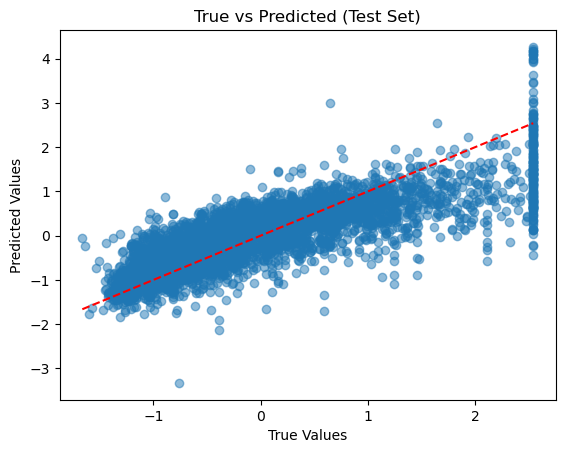

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted (Test Set)")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # perfect line
plt.show()
